In [1]:
import folium
import requests
import json
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [253]:
RAW_DIR = "./data/raw/"
OUTPUT_DIR = "./data/working/"
COLUMNS_DIR = "./data/columns/"
COLUMNS_JUNGGU_DIR = "./data/columns중구/"
CAPTURE_DIR = "./data/captures"

os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(COLUMNS_DIR, exist_ok=True)
os.makedirs(COLUMNS_JUNGGU_DIR, exist_ok=True)
os.makedirs(CAPTURE_DIR, exist_ok=True)

## 1-1. 중구 대여소 using CSV (2024년 6월 기준)

In [8]:
stations_csv = pd.read_csv("./data/working/공공자전거_대여소_정보_CSV.csv")

In [10]:
stations_csv.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [12]:
stations_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2763 non-null   int64  
 1   보관소(대여소)명  2763 non-null   object 
 2   자치구        2763 non-null   object 
 3   상세주소       2763 non-null   object 
 4   위도         2763 non-null   float64
 5   경도         2763 non-null   float64
 6   설치시기       2763 non-null   object 
 7   LCD거치대수    1444 non-null   float64
 8   QR거치대수     1662 non-null   float64
 9   운영방식       2763 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 216.0+ KB


In [14]:
stations_csv.shape

(2763, 10)

In [16]:
stations_csv["자치구"].value_counts()

자치구
송파구     217
강서구     191
강남구     178
영등포구    159
노원구     151
서초구     147
마포구     119
강동구     117
구로구     115
양천구     112
종로구     102
은평구      98
중랑구      94
성동구      94
용산구      91
중구       90
광진구      83
성북구      82
동대문구     82
서대문구     81
관악구      76
도봉구      75
금천구      75
동작구      74
강북구      60
Name: count, dtype: int64

- `자치구`가 `중구`인 것들만 추출

In [19]:
junggu_stats_csv = stations_csv[stations_csv["자치구"] == "중구"]

In [21]:
junggu_stats_csv.head()

,대여소번호,보관소(대여소)명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
102,300,정동사거리,중구,서울특별시 중구 정동길 2-1 정동사거리,37.568050,126.969231,2015-10-07 00:00:00,7.0,6.0,QR
103,310,청계광장 옆,중구,서울특별시 중구 세종대로 136 청계광장 옆,37.568878,126.977470,2015-10-07 12:11:15,13.0,8.0,QR
104,318,광교사거리 남측,중구,서울특별시 중구 남대문로 125 DGB금융센터,37.568634,126.982315,2015-10-07 12:16:35,10.0,10.0,QR
105,320,을지로입구역 4번출구 앞,중구,서울특별시 중구 을지로 55 명동금융센터 앞,37.566223,126.983589,2015-10-07 12:18:35,20.0,17.0,QR
106,321,KEB 하나금융그룹 명동사옥 옆,중구,서울특별시 중구 을지로 66 한국외환은행 본점 앞,37.565464,126.984138,2015-10-07 12:19:23,15.0,15.0,QR


In [23]:
junggu_stats_csv.shape

(90, 10)

In [25]:
junggu_stats_csv.isnull().sum()

대여소번호         0
보관소(대여소)명     0
자치구           0
상세주소          0
위도            0
경도            0
설치시기          0
LCD거치대수      54
QR거치대수       20
운영방식          0
dtype: int64

In [27]:
junggu_stats_csv.nunique()

대여소번호        90
보관소(대여소)명    90
자치구           1
상세주소         90
위도           89
경도           90
설치시기         51
LCD거치대수      12
QR거치대수       18
운영방식          2
dtype: int64

## 1-2. 중구 대여소 using API

In [30]:
stations_api = pd.read_csv("./data/working/공공자전거_대여소_정보_API.csv")

In [32]:
stations_api.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
0,마포구,ST-10,108,서교동 사거리,108. 서교동 사거리,12.0,서울특별시 마포구 양화로 93,427,37.552746,126.918617,0,0,1
1,광진구,ST-100,503,더샵스타시티 C동 앞,503. 더샵스타시티 C동 앞,15.0,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593,0,0,2
2,양천구,ST-1000,729,서부식자재마트 건너편,729. 서부식자재마트 건너편,10.0,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798,0,0,3
3,양천구,ST-1002,731,서울시 도로환경관리센터,731. 서울시 도로환경관리센터,10.0,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541,0,0,4
4,양천구,ST-1003,732,신월중학교,732. 신월중학교,10.0,서울특별시 양천구 화곡로 59,신월동 이마트,37.539551,126.828300,0,0,5


In [34]:
stations_api.shape

(3183, 13)

In [36]:
stations_api["STA_LOC"].value_counts()

STA_LOC
송파구     245
강서구     217
영등포구    192
강남구     189
노원구     170
서초구     169
마포구     142
강동구     137
구로구     124
양천구     120
종로구     118
은평구     115
성동구     109
광진구     108
중구      107
중랑구     106
동대문구    104
성북구      99
용산구      97
관악구      95
도봉구      95
서대문구     94
동작구      83
금천구      79
강북구      69
Name: count, dtype: int64

- `자치구`가 `중구`인 것들만 추출

In [39]:
junggu_stats_api = stations_api[stations_api["STA_LOC"] == "중구"]
junggu_stats_api.head()

,STA_LOC,RENT_ID,RENT_NO,RENT_NM,RENT_ID_NM,HOLD_NUM,STA_ADD1,STA_ADD2,STA_LAT,STA_LONG,START_INDEX,END_INDEX,RNUM
153,중구,ST-116,300,정동사거리,300. 정동사거리,6.0,서울특별시 중구 정동길 2-1,정동사거리,37.568050,126.969231,0,0,154
247,중구,ST-126,310,청계광장 옆,310. 청계광장 옆,8.0,서울특별시 중구 세종대로 136,청계광장 옆,37.568878,126.977470,0,0,248
266,중구,ST-128,312,시청역 1번출구 뒤,312. 시청역 1번출구 뒤,7.0,서울특별시 중구 세종대로 지하101,1번출구 뒤,37.564674,126.976738,0,0,267
277,중구,ST-129,313,서울역 광장 파출소 옆,313. 서울역 광장 파출소 옆,5.0,서울특별시 중구 통일로 13,서울역 광장 파출소 옆,37.556961,126.971771,0,0,278
327,중구,ST-134,318,광교사거리 남측,318. 광교사거리 남측,10.0,서울특별시 중구 남대문로 125 DGB금융센터,NaN,37.568634,126.982315,0,0,328


In [41]:
junggu_stats_api.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 153 to 3162
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STA_LOC      107 non-null    object 
 1   RENT_ID      107 non-null    object 
 2   RENT_NO      107 non-null    int64  
 3   RENT_NM      107 non-null    object 
 4   RENT_ID_NM   107 non-null    object 
 5   HOLD_NUM     106 non-null    float64
 6   STA_ADD1     107 non-null    object 
 7   STA_ADD2     36 non-null     object 
 8   STA_LAT      107 non-null    float64
 9   STA_LONG     107 non-null    float64
 10  START_INDEX  107 non-null    int64  
 11  END_INDEX    107 non-null    int64  
 12  RNUM         107 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 11.7+ KB


In [43]:
junggu_stats_api.isnull().sum()

STA_LOC         0
RENT_ID         0
RENT_NO         0
RENT_NM         0
RENT_ID_NM      0
HOLD_NUM        1
STA_ADD1        0
STA_ADD2       71
STA_LAT         0
STA_LONG        0
START_INDEX     0
END_INDEX       0
RNUM            0
dtype: int64

In [45]:
junggu_stats_api.shape

(107, 13)

## 2. 중구 6월 이용량 집계

In [48]:
usage = pd.read_csv("./data/working/tpss_bcycl_od_statnhm_202406_통합_w_자치구.csv")

In [49]:
usage.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,전체_이용_분,전체_이용_거리
0,20240601,출발시간,0,ST-1002,목1동_004_1,양천구,ST-1017,목5동_059_1,양천구,1,8.0,870.0
1,20240601,출발시간,0,ST-1015,목5동_001_1,양천구,ST-997,목4동_021_1,양천구,1,10.0,1552.0
2,20240601,출발시간,0,ST-1036,역촌동_001_1,은평구,ST-1035,불광2동_021_1,은평구,1,42.0,4980.0
3,20240601,출발시간,0,ST-1045,성내2동_007_1,강동구,ST-1580,오륜동_001_3,송파구,1,8.0,1923.0
4,20240601,출발시간,0,ST-1047,성내1동_023_1,강동구,ST-488,암사1동_044_1,강동구,1,18.0,3530.0


In [50]:
usage.shape

(8831528, 12)

- `전체_이용_분`, `전체_이용_거리` -> 분석에 쓰지 않으니 drop

In [55]:
# 불필요한 컬럼
usage = usage.drop(columns=["전체_이용_분", "전체_이용_거리"], errors="ignore")

In [56]:
usage.shape

(8831528, 10)

- `시작_대여소_자치구`, `종료_대여소_자치구` -> 둘 중 하나라도 NaN이면 행 제거
    - 집계기준(`출발시간`, `도착시간`)이 매칭되어야 "대여량+반납량"을 합산해서 이용량을 계산할 수 있는데, 자치구가 하나라도 빠지면 매핑이 불가능하기 때문

In [60]:
# 시작/종료 자치구 중 하나라도 결측이면 제거
usage = usage.dropna(subset=["시작_대여소_자치구", "종료_대여소_자치구"])

In [61]:
usage.shape

(8799690, 10)

In [64]:
usage["기준_시간대"].nunique()

288

In [66]:
print(len(usage[usage["집계_기준"] == "출발시간"]))
print(len(usage[usage["집계_기준"] == "도착시간"]))

4412120
4387570


- 중구 데이터만 추출
    - (`usage["시작_대여소_자치구"] == "중구"`) | (`usage["종료_대여소_자치구"] == "중구"`)

In [69]:
junggu_usage = usage[
    (usage["시작_대여소_자치구"] == "중구") | (usage["종료_대여소_자치구"] == "중구")
]

In [70]:
junggu_usage.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수
46,20240601,출발시간,0,ST-143,종로1·2·3·4가동_009_1,종로구,ST-943,을지로동_003_1,중구,1
47,20240601,출발시간,0,ST-145,종로1·2·3·4가동_014_1,종로구,ST-1779,을지로동_006_1,중구,1
51,20240601,출발시간,0,ST-147,명동_002_3,중구,ST-2626,광희동_002_2,중구,2
85,20240601,출발시간,0,ST-1780,광희동_001_1,중구,ST-1781,신당동_004_2,중구,2
215,20240601,출발시간,0,ST-3053,중림동_001_1,중구,ST-437,청파동_027_1,용산구,1


In [73]:
junggu_usage.tail()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수
8831209,20240630,도착시간,2350,ST-947,삼선동_001_1,성북구,ST-1440,황학동_011_1,중구,1
8831298,20240630,도착시간,2355,ST-1609,숭인2동_005_1,종로구,ST-189,동화동_002_1,중구,1
8831299,20240630,도착시간,2355,ST-162,신당동_004_1,중구,ST-1813,창신1동_010_1,종로구,1
8831334,20240630,도착시간,2355,ST-197,다산동_016_1,중구,ST-197,다산동_016_1,중구,2
8831522,20240630,도착시간,2355,ST-946,청파동_011_1,중구,ST-437,청파동_027_1,용산구,1


In [75]:
junggu_usage.shape

(283692, 10)

In [77]:
junggu_usage.isnull().sum()

기준_날짜         0
집계_기준         0
기준_시간대        0
시작_대여소_ID     0
시작_대여소명       0
시작_대여소_자치구    0
종료_대여소_ID     0
종료_대여소명       0
종료_대여소_자치구    0
전체_건수         0
dtype: int64

In [79]:
junggu_usage["시작_대여소명"].unique()

array(['종로1·2·3·4가동_009_1', '종로1·2·3·4가동_014_1', '명동_002_3', ...,
       '수유3동_016_1', '방배본동_030_1', '압구정동_043_1'], dtype=object)

In [81]:
junggu_usage["시작_대여소명"].nunique()

1146

In [83]:
junggu_usage["종료_대여소명"].unique()

array(['을지로동_003_1', '을지로동_006_1', '광희동_002_2', ..., '중계1동_024_1',
       '가양1동_002_3', '여의동_035_2'], dtype=object)

In [85]:
junggu_usage["종료_대여소명"].nunique()

1386

## 3. `대여소별`/`주간(평일/주말)`/`시간대별` 그룹화

In [88]:
df = junggu_usage.copy()
df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수
46,20240601,출발시간,0,ST-143,종로1·2·3·4가동_009_1,종로구,ST-943,을지로동_003_1,중구,1
47,20240601,출발시간,0,ST-145,종로1·2·3·4가동_014_1,종로구,ST-1779,을지로동_006_1,중구,1
51,20240601,출발시간,0,ST-147,명동_002_3,중구,ST-2626,광희동_002_2,중구,2
85,20240601,출발시간,0,ST-1780,광희동_001_1,중구,ST-1781,신당동_004_2,중구,2
215,20240601,출발시간,0,ST-3053,중림동_001_1,중구,ST-437,청파동_027_1,용산구,1


In [90]:
df.shape

(283692, 10)

- `주간` 컬럼 추가
    - 평일/주말

In [93]:
df["기준_날짜"] = pd.to_datetime(df["기준_날짜"], format="%Y%m%d")
df["주간"] = np.where(df["기준_날짜"].dt.dayofweek < 5, "평일", "주말")

In [95]:
df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,주간
46,2024-06-01,출발시간,0,ST-143,종로1·2·3·4가동_009_1,종로구,ST-943,을지로동_003_1,중구,1,주말
47,2024-06-01,출발시간,0,ST-145,종로1·2·3·4가동_014_1,종로구,ST-1779,을지로동_006_1,중구,1,주말
51,2024-06-01,출발시간,0,ST-147,명동_002_3,중구,ST-2626,광희동_002_2,중구,2,주말
85,2024-06-01,출발시간,0,ST-1780,광희동_001_1,중구,ST-1781,신당동_004_2,중구,2,주말
215,2024-06-01,출발시간,0,ST-3053,중림동_001_1,중구,ST-437,청파동_027_1,용산구,1,주말


In [97]:
df.tail()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,주간
8831209,2024-06-30,도착시간,2350,ST-947,삼선동_001_1,성북구,ST-1440,황학동_011_1,중구,1,주말
8831298,2024-06-30,도착시간,2355,ST-1609,숭인2동_005_1,종로구,ST-189,동화동_002_1,중구,1,주말
8831299,2024-06-30,도착시간,2355,ST-162,신당동_004_1,중구,ST-1813,창신1동_010_1,종로구,1,주말
8831334,2024-06-30,도착시간,2355,ST-197,다산동_016_1,중구,ST-197,다산동_016_1,중구,2,주말
8831522,2024-06-30,도착시간,2355,ST-946,청파동_011_1,중구,ST-437,청파동_027_1,용산구,1,주말


- `시간대` 컬럼 추가
    - 기준_시간대 // 100

In [100]:
df["시간대"] = df["기준_시간대"] // 100

In [102]:
df.shape

(283692, 12)

In [104]:
df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,주간,시간대
46,2024-06-01,출발시간,0,ST-143,종로1·2·3·4가동_009_1,종로구,ST-943,을지로동_003_1,중구,1,주말,0
47,2024-06-01,출발시간,0,ST-145,종로1·2·3·4가동_014_1,종로구,ST-1779,을지로동_006_1,중구,1,주말,0
51,2024-06-01,출발시간,0,ST-147,명동_002_3,중구,ST-2626,광희동_002_2,중구,2,주말,0
85,2024-06-01,출발시간,0,ST-1780,광희동_001_1,중구,ST-1781,신당동_004_2,중구,2,주말,0
215,2024-06-01,출발시간,0,ST-3053,중림동_001_1,중구,ST-437,청파동_027_1,용산구,1,주말,0


In [106]:
df.tail()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,시작_대여소_자치구,종료_대여소_ID,종료_대여소명,종료_대여소_자치구,전체_건수,주간,시간대
8831209,2024-06-30,도착시간,2350,ST-947,삼선동_001_1,성북구,ST-1440,황학동_011_1,중구,1,주말,23
8831298,2024-06-30,도착시간,2355,ST-1609,숭인2동_005_1,종로구,ST-189,동화동_002_1,중구,1,주말,23
8831299,2024-06-30,도착시간,2355,ST-162,신당동_004_1,중구,ST-1813,창신1동_010_1,종로구,1,주말,23
8831334,2024-06-30,도착시간,2355,ST-197,다산동_016_1,중구,ST-197,다산동_016_1,중구,2,주말,23
8831522,2024-06-30,도착시간,2355,ST-946,청파동_011_1,중구,ST-437,청파동_027_1,용산구,1,주말,23


- 중구 대여소만

In [109]:
# 출발시간 -> 시작_대여소가 중구일 때 = 대여건수
rentals = (
    df[(df["집계_기준"] == "출발시간") & (df["시작_대여소_자치구"] == "중구")]
      .groupby(["시작_대여소_ID","시작_대여소명","주간","시간대"], as_index=False)["전체_건수"]
      .sum()
      .rename(columns={
          "시작_대여소_ID": "대여소_ID",
          "시작_대여소명": "대여소명",
          "전체_건수": "대여건수"
      })
)

In [111]:
rentals.shape

(3850, 5)

In [113]:
rentals.head()

,대여소_ID,대여소명,주간,시간대,대여건수
0,ST-116,소공동_002_1,주말,0,1
1,ST-116,소공동_002_1,주말,1,1
2,ST-116,소공동_002_1,주말,2,4
3,ST-116,소공동_002_1,주말,7,4
4,ST-116,소공동_002_1,주말,8,6


In [115]:
rentals.tail()

,대여소_ID,대여소명,주간,시간대,대여건수
3845,ST-977,소공동_002_6,평일,19,40
3846,ST-977,소공동_002_6,평일,20,21
3847,ST-977,소공동_002_6,평일,21,11
3848,ST-977,소공동_002_6,평일,22,10
3849,ST-977,소공동_002_6,평일,23,2


In [117]:
rentals.isnull().sum()

대여소_ID    0
대여소명      0
주간        0
시간대       0
대여건수      0
dtype: int64

In [119]:
# 도착시간 → 종료_대여소가 중구일 때 = 반납건수
returns = (
    df[(df["집계_기준"] == "도착시간") & (df["종료_대여소_자치구"] == "중구")]
      .groupby(["종료_대여소_ID","종료_대여소명","주간","시간대"], as_index=False)["전체_건수"]
      .sum()
      .rename(columns={
          "종료_대여소_ID": "대여소_ID",
          "종료_대여소명": "대여소명",
          "전체_건수": "반납건수"
      })
)

In [121]:
returns.shape

(3772, 5)

In [123]:
returns.head()

,대여소_ID,대여소명,주간,시간대,반납건수
0,ST-116,소공동_002_1,주말,0,2
1,ST-116,소공동_002_1,주말,1,1
2,ST-116,소공동_002_1,주말,2,2
3,ST-116,소공동_002_1,주말,5,1
4,ST-116,소공동_002_1,주말,7,4


- rentals + returns 통합

In [126]:
junggu_grouped = pd.merge(
    rentals, returns,
    on=["대여소_ID","대여소명","주간","시간대"],
    how="outer"
).fillna(0)

junggu_grouped

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수
0,ST-116,소공동_002_1,주말,0,1.0,2.0
1,ST-116,소공동_002_1,주말,1,1.0,1.0
2,ST-116,소공동_002_1,주말,2,4.0,2.0
3,ST-116,소공동_002_1,주말,5,0.0,1.0
4,ST-116,소공동_002_1,주말,7,4.0,4.0
...,...,...,...,...,...,...
4044,ST-977,소공동_002_6,평일,19,40.0,43.0
4045,ST-977,소공동_002_6,평일,20,21.0,17.0
4046,ST-977,소공동_002_6,평일,21,11.0,8.0
4047,ST-977,소공동_002_6,평일,22,10.0,15.0


In [128]:
junggu_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   대여소_ID  4049 non-null   object 
 1   대여소명    4049 non-null   object 
 2   주간      4049 non-null   object 
 3   시간대     4049 non-null   int64  
 4   대여건수    4049 non-null   float64
 5   반납건수    4049 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 189.9+ KB


In [130]:
# 타입변경
junggu_grouped["대여건수"] = junggu_grouped["대여건수"].astype(int)
junggu_grouped["반납건수"] = junggu_grouped["반납건수"].astype(int)

In [132]:
junggu_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소_ID  4049 non-null   object
 1   대여소명    4049 non-null   object
 2   주간      4049 non-null   object
 3   시간대     4049 non-null   int64 
 4   대여건수    4049 non-null   int32 
 5   반납건수    4049 non-null   int32 
dtypes: int32(2), int64(1), object(3)
memory usage: 158.3+ KB


- `총이용건수` 컬럼 추가

In [135]:
junggu_grouped["총이용건수"] = junggu_grouped["대여건수"] + junggu_grouped["반납건수"]
junggu_grouped["총이용건수"] = junggu_grouped["총이용건수"].astype(int)
junggu_grouped

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수,총이용건수
0,ST-116,소공동_002_1,주말,0,1,2,3
1,ST-116,소공동_002_1,주말,1,1,1,2
2,ST-116,소공동_002_1,주말,2,4,2,6
3,ST-116,소공동_002_1,주말,5,0,1,1
4,ST-116,소공동_002_1,주말,7,4,4,8
...,...,...,...,...,...,...,...
4044,ST-977,소공동_002_6,평일,19,40,43,83
4045,ST-977,소공동_002_6,평일,20,21,17,38
4046,ST-977,소공동_002_6,평일,21,11,8,19
4047,ST-977,소공동_002_6,평일,22,10,15,25


In [137]:
# 정렬 순서
junggu_grouped = junggu_grouped.sort_values(["대여소_ID", "주간", "시간대"]).reset_index(drop=True)
junggu_grouped.head()

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수,총이용건수
0,ST-116,소공동_002_1,주말,0,1,2,3
1,ST-116,소공동_002_1,주말,1,1,1,2
2,ST-116,소공동_002_1,주말,2,4,2,6
3,ST-116,소공동_002_1,주말,5,0,1,1
4,ST-116,소공동_002_1,주말,7,4,4,8


In [139]:
junggu_grouped

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수,총이용건수
0,ST-116,소공동_002_1,주말,0,1,2,3
1,ST-116,소공동_002_1,주말,1,1,1,2
2,ST-116,소공동_002_1,주말,2,4,2,6
3,ST-116,소공동_002_1,주말,5,0,1,1
4,ST-116,소공동_002_1,주말,7,4,4,8
...,...,...,...,...,...,...,...
4044,ST-977,소공동_002_6,평일,19,40,43,83
4045,ST-977,소공동_002_6,평일,20,21,17,38
4046,ST-977,소공동_002_6,평일,21,11,8,19
4047,ST-977,소공동_002_6,평일,22,10,15,25


In [141]:
junggu_grouped["대여소명"].unique()

array(['소공동_002_1', '명동_001_1', '명동_001_2', '명동_002_1', '명동_003_1',
       '명동_003_2', '소공동_004_1', '을지로동_004_1', '중림동_008_1', '을지로동_005_1',
       '다산동_017_1', '광희동_006_1', '황학동_011_1', '명동_002_3', '명동_003_4',
       '필동_004_1', '신당동_004_1', '광희동_003_1', '명동_001_3', '신당5동_017_1',
       '회현동_012_1', '소공동_005_1', '중림동_010_1', '소공동_005_2', '소공동_005_3',
       '명동_001_4', '소공동_004_2', '소공동_004_3', '회현동_010_1', '회현동_001_1',
       '회현동_007_1', '명동_002_4', '을지로동_006_1', '광희동_001_1', '신당동_004_2',
       '광희동_005_1', '장충동_006_1', '장충동_003_1', '약수동_006_1', '약수동_023_1',
       '회현동_008_1', '회현동_004_1', '소공동_005_4', '장충동_009_1', '약수동_005_1',
       '동화동_002_1', '회현동_012_2', '광희동_002_1', '장충동_009_2', '다산동_016_1',
       '신당동_002_1', '중림동_002_1', '명동_002_6', '회현동_004_3', '광희동_001_2',
       '중림동_002_2', '중림동_004_1', '중림동_002_3', '소공동_002_3', '을지로동_005_2',
       '명동_001_6', '명동_001_7', '소공동_005_5', '명동_001_8', '명동_003_5',
       '회현동_001_2', '을지로동_005_3', '명동_002_7', '명동_003_7', '중림동_012_1',
    

In [143]:
junggu_grouped["대여소명"].nunique()

90

- 평일/주말 합계만 따로 피벗

In [146]:
weekly_sum = (
    junggu_grouped.groupby("주간", as_index=False)[["대여건수","반납건수","총이용건수"]].sum()
)

In [148]:
weekly_pivot = weekly_sum.set_index("주간").T
display(weekly_pivot)

주간,주말,평일
대여건수,19639,80962
반납건수,18900,76575
총이용건수,38539,157537


- 시간대별

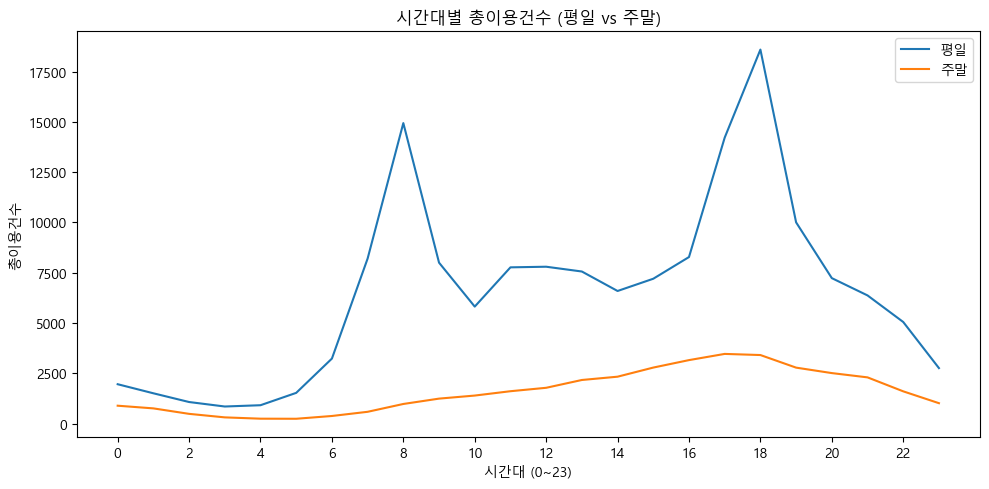

In [151]:
# 라인그래프
per_time = junggu_grouped.groupby(["주간","시간대"], as_index=False)[["대여건수","반납건수","총이용건수"]].sum()
prof_line = per_time.pivot(index="시간대", columns="주간", values="총이용건수").reindex(range(24))   # 0~23 보장.fillna(0)

plt.figure(figsize=(10,5))
plt.plot(prof_line.index, prof_line.get("평일", pd.Series(0, index=prof_line.index)), label="평일")
plt.plot(prof_line.index, prof_line.get("주말", pd.Series(0, index=prof_line.index)), label="주말")
plt.title("시간대별 총이용건수 (평일 vs 주말)")
plt.xlabel("시간대 (0~23)")
plt.ylabel("총이용건수")
plt.xticks(range(0,24,2))
plt.legend()
plt.tight_layout()
plt.show()

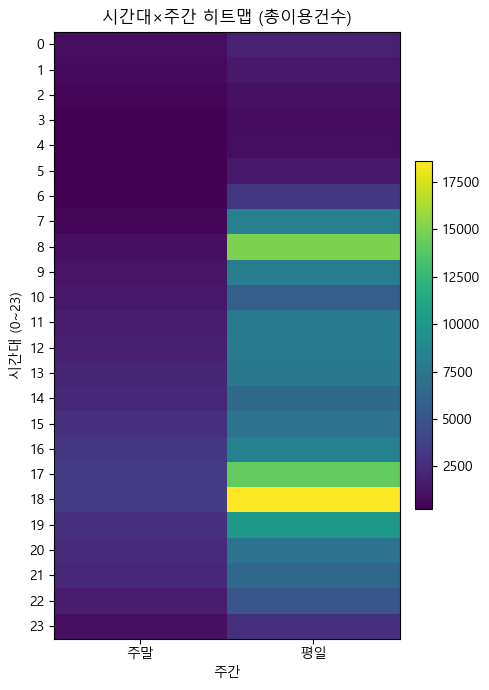

In [153]:
# 히트
prof_heat = prof_line.copy()

plt.figure(figsize=(5,7))
im = plt.imshow(prof_heat.values, aspect="auto")

plt.title("시간대×주간 히트맵 (총이용건수)")
plt.xlabel("주간")
plt.ylabel("시간대 (0~23)")
plt.xticks(range(len(prof_heat.columns)), prof_heat.columns)
plt.yticks(range(24), prof_heat.index)
plt.colorbar(im, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

- 상위 이용 대여소 in 중구

In [156]:
station_rank = (
    junggu_grouped.groupby(["대여소_ID","대여소명"], as_index=False)[["대여건수","반납건수","총이용건수"]]
                  .sum()
                  .sort_values("총이용건수", ascending=False)
)

display(station_rank.head(20))

,대여소_ID,대여소명,대여건수,반납건수,총이용건수
50,ST-198,신당동_002_1,6000,6085,12085
12,ST-1440,황학동_011_1,5028,4934,9962
76,ST-2903,황학동_007_1,2857,2864,5721
42,ST-185,소공동_005_4,2964,2729,5693
33,ST-1780,광희동_001_1,3174,2367,5541
32,ST-1779,을지로동_006_1,2334,2209,4543
72,ST-2693,명동_001_10,2326,2030,4356
18,ST-1668,명동_001_3,2398,1936,4334
7,ST-1435,을지로동_004_1,2092,2127,4219
54,ST-2431,광희동_001_2,2053,2069,4122


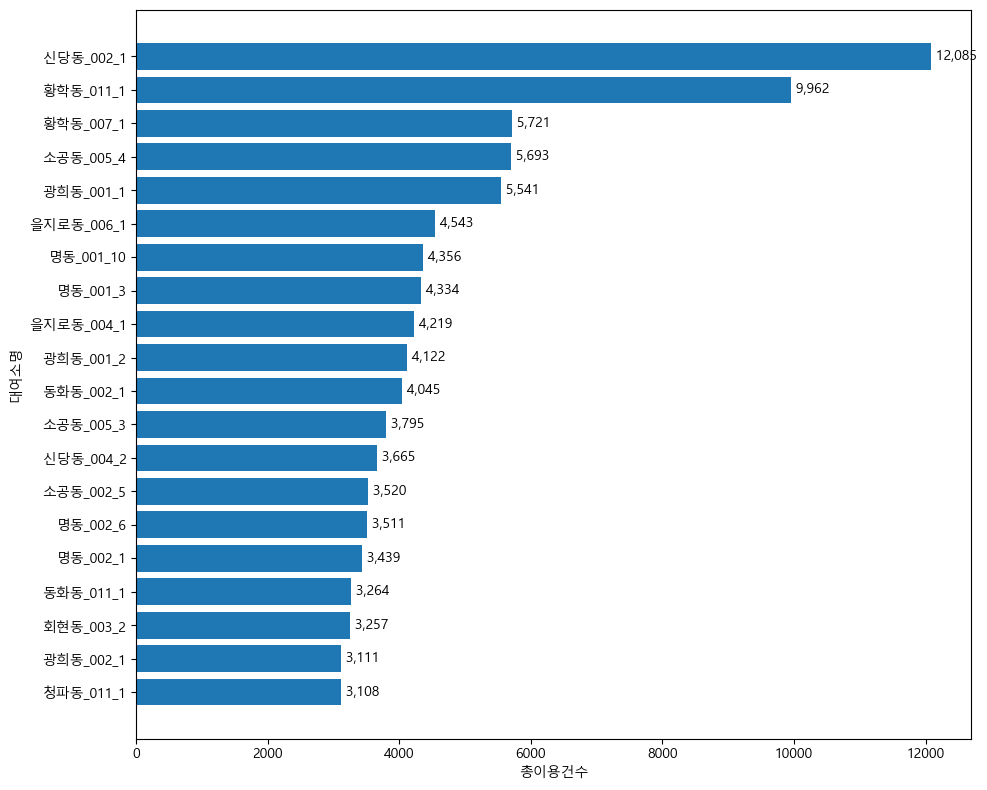

In [158]:
# 막대그래프 (총이용건수 Top20)
rank_plot = station_rank.head(20).copy()

plt.figure(figsize=(10, 8))

plt.barh(rank_plot["대여소명"], rank_plot["총이용건수"])
plt.gca().invert_yaxis()
plt.xlabel("총이용건수")
plt.ylabel("대여소명")

# 값 라벨
for i, v in enumerate(rank_plot["총이용건수"]):
    plt.text(v, i, f" {int(v):,}", va="center")
    
plt.tight_layout()
plt.show()

## 4. 대여소별 시간대별 잔여 자전거

In [161]:
remained = pd.read_csv("./data/working/대여소별_대여가능_수량_1시간단위_w_자치구_최종본.csv")

In [162]:
remained.shape

(1704144, 5)

In [165]:
remained.head()

,대여소자치구,대여소번호,일시,시간대,거치대수량
0,강남구,2301,2024-06-01,0,6
1,강남구,2301,2024-06-01,1,8
2,강남구,2301,2024-06-01,2,7
3,강남구,2301,2024-06-01,3,6
4,강남구,2301,2024-06-01,4,6


In [167]:
remained["대여소자치구"].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [169]:
remained["대여소자치구"].nunique()

25

In [171]:
remained.isnull().sum()

대여소자치구    0
대여소번호     0
일시        0
시간대       0
거치대수량     0
dtype: int64

In [173]:
# '대여소자치구'가 없는 행만 보기
na_remained = (
    remained[remained["대여소자치구"].isna()]
    .sort_values(["일시","대여소번호","시간대"])
    .copy()
)

In [175]:
na_remained.head()

,대여소자치구,대여소번호,일시,시간대,거치대수량


- `대여소자치구` 결측치 제거

In [178]:
remained = remained.dropna(subset=["대여소자치구"]).reset_index(drop=True)

In [180]:
remained.shape

(1704144, 5)

In [182]:
remained["대여소자치구"].isna().sum()

0

In [184]:
remained["대여소자치구"].nunique()

25

In [186]:
remained["대여소자치구"].value_counts()

대여소자치구
송파구     134784
강서구     118560
강남구     107328
영등포구     96720
노원구      92976
서초구      88608
마포구      74880
구로구      71136
강동구      70512
양천구      68016
종로구      63648
은평구      61776
중랑구      58656
성동구      58656
용산구      57408
중구       55536
광진구      51792
동대문구     51168
성북구      50544
서대문구     50544
도봉구      46800
금천구      46176
관악구      45552
동작구      44928
강북구      37440
Name: count, dtype: int64

In [188]:
junggu_remained = remained[remained["대여소자치구"] == "중구"]

In [190]:
junggu_remained.shape

(55536, 5)

In [192]:
junggu_remained

,대여소자치구,대여소번호,일시,시간대,거치대수량
1589952,중구,300,2024-06-01,0,0
1589953,중구,300,2024-06-01,1,0
1589954,중구,300,2024-06-01,2,0
1589955,중구,300,2024-06-01,3,0
1589956,중구,300,2024-06-01,4,0
...,...,...,...,...,...
1645483,중구,6058,2024-06-30,19,5
1645484,중구,6058,2024-06-30,20,3
1645485,중구,6058,2024-06-30,21,2
1645486,중구,6058,2024-06-30,22,2


In [194]:
junggu_remained["대여소번호"].nunique()

89

In [196]:
junggu_remained.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55536 entries, 1589952 to 1645487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소자치구  55536 non-null  object
 1   대여소번호   55536 non-null  int64 
 2   일시      55536 non-null  object
 3   시간대     55536 non-null  int64 
 4   거치대수량   55536 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


In [198]:
junggu_remained.shape

(55536, 5)

- `대여소_NO` 매핑

In [201]:
# RENT_NO 가져오기 from junggu_api
junggu_remained = (
    junggu_remained
    .merge(junggu_stats_api[["RENT_NO","RENT_ID"]], left_on="대여소번호", right_on="RENT_NO", how="left")
    .drop(columns=["RENT_NO"])
    .rename(columns={"RENT_ID": "대여소_ID"})
)

In [203]:
junggu_remained.shape

(55536, 6)

In [205]:
junggu_remained.isnull().sum()

대여소자치구    0
대여소번호     0
일시        0
시간대       0
거치대수량     0
대여소_ID    0
dtype: int64

In [207]:
junggu_remained.head()

,대여소자치구,대여소번호,일시,시간대,거치대수량,대여소_ID
0,중구,300,2024-06-01,0,0,ST-116
1,중구,300,2024-06-01,1,0,ST-116
2,중구,300,2024-06-01,2,0,ST-116
3,중구,300,2024-06-01,3,0,ST-116
4,중구,300,2024-06-01,4,0,ST-116


In [209]:
junggu_remained["대여소번호"].nunique()

89

In [211]:
junggu_remained["시간대"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

- `주간` 컬럼 추가

In [214]:
# 주간, 시간대 정수화
junggu_remained = junggu_remained.copy()
junggu_remained["일시"] = pd.to_datetime(junggu_remained["일시"])
junggu_remained["주간"] = np.where(junggu_remained["일시"].dt.dayofweek < 5, "평일", "주말")
junggu_remained["시간대"] = pd.to_numeric(junggu_remained["시간대"], errors="coerce").astype("Int64")

In [216]:
junggu_remained.head()

,대여소자치구,대여소번호,일시,시간대,거치대수량,대여소_ID,주간
0,중구,300,2024-06-01,0,0,ST-116,주말
1,중구,300,2024-06-01,1,0,ST-116,주말
2,중구,300,2024-06-01,2,0,ST-116,주말
3,중구,300,2024-06-01,3,0,ST-116,주말
4,중구,300,2024-06-01,4,0,ST-116,주말


In [218]:
junggu_remained.shape

(55536, 7)

In [220]:
junggu_remained["대여소자치구"].unique()

array(['중구'], dtype=object)

In [222]:
# 잔여자전거수량 매핑 
junggu_rem_grouped = (
    junggu_remained.groupby(["대여소자치구", "대여소_ID", "대여소번호", "주간", "시간대"], as_index=False)["거치대수량"]
                   .sum()
                   .rename(columns={"거치대수량": "잔여자전거수"})
)

In [224]:
junggu_rem_grouped.shape

(4272, 6)

In [226]:
junggu_rem_grouped.head()

,대여소자치구,대여소_ID,대여소번호,주간,시간대,잔여자전거수
0,중구,ST-116,300,주말,0,5
1,중구,ST-116,300,주말,1,7
2,중구,ST-116,300,주말,2,6
3,중구,ST-116,300,주말,3,5
4,중구,ST-116,300,주말,4,5


In [228]:
junggu_rem_grouped["대여소번호"].nunique()

89

In [230]:
junggu_rem_grouped.isnull().sum()

대여소자치구    0
대여소_ID    0
대여소번호     0
주간        0
시간대       0
잔여자전거수    0
dtype: int64

In [232]:
junggu_rem_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4272 entries, 0 to 4271
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소자치구  4272 non-null   object
 1   대여소_ID  4272 non-null   object
 2   대여소번호   4272 non-null   int64 
 3   주간      4272 non-null   object
 4   시간대     4272 non-null   Int64 
 5   잔여자전거수  4272 non-null   int64 
dtypes: Int64(1), int64(2), object(3)
memory usage: 204.6+ KB


In [234]:
junggu_rem_grouped.shape

(4272, 6)

In [236]:
junggu_rem_grouped

,대여소자치구,대여소_ID,대여소번호,주간,시간대,잔여자전거수
0,중구,ST-116,300,주말,0,5
1,중구,ST-116,300,주말,1,7
2,중구,ST-116,300,주말,2,6
3,중구,ST-116,300,주말,3,5
4,중구,ST-116,300,주말,4,5
...,...,...,...,...,...,...
4267,중구,ST-977,391,평일,19,15
4268,중구,ST-977,391,평일,20,19
4269,중구,ST-977,391,평일,21,11
4270,중구,ST-977,391,평일,22,12


- **대여건수/반납건수/잔여자전거수**

In [239]:
junggu_grouped.head()

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수,총이용건수
0,ST-116,소공동_002_1,주말,0,1,2,3
1,ST-116,소공동_002_1,주말,1,1,1,2
2,ST-116,소공동_002_1,주말,2,4,2,6
3,ST-116,소공동_002_1,주말,5,0,1,1
4,ST-116,소공동_002_1,주말,7,4,4,8


In [241]:
junggu_grouped.shape

(4049, 7)

In [243]:
junggu_rem_grouped.head()

,대여소자치구,대여소_ID,대여소번호,주간,시간대,잔여자전거수
0,중구,ST-116,300,주말,0,5
1,중구,ST-116,300,주말,1,7
2,중구,ST-116,300,주말,2,6
3,중구,ST-116,300,주말,3,5
4,중구,ST-116,300,주말,4,5


In [245]:
junggu_rem_grouped.shape

(4272, 6)

In [247]:
# 양쪽 데이터 병합 (outer join으로 모든 대여소_ID, 주간, 시간대 포함)
merged_group = pd.merge(
    junggu_grouped, 
    junggu_rem_grouped[["대여소자치구", "대여소_ID", "대여소번호", "주간", "시간대", "잔여자전거수"]],
    on=["대여소_ID", "주간", "시간대"], 
    how="outer"
)

# 대여소명 컬럼은 제외
merged_group = merged_group.drop(columns=["대여소명"])

# 결측값을 0으로 채우기 (대여건수, 반납건수, 잔여자전거수)
merged_group["대여건수"] = merged_group["대여건수"].fillna(0).astype(int)
merged_group["반납건수"] = merged_group["반납건수"].fillna(0).astype(int)
merged_group["총이용건수"] = merged_group["총이용건수"].fillna(0).astype(int)
merged_group["잔여자전거수"] = merged_group["잔여자전거수"].fillna(0).astype(int)
merged_group["대여소번호"] = merged_group["대여소번호"].fillna(0).apply(lambda x: str(int(x)))

# 컬럼 순서 
merged_group = merged_group[[
    "대여소자치구", "대여소_ID", "대여소번호", "주간", "시간대", "대여건수", "반납건수", "총이용건수", "잔여자전거수"
]]

In [249]:
merged_group

,대여소자치구,대여소_ID,대여소번호,주간,시간대,대여건수,반납건수,총이용건수,잔여자전거수
0,중구,ST-116,300,주말,0,1,2,3,5
1,중구,ST-116,300,주말,1,1,1,2,7
2,중구,ST-116,300,주말,2,4,2,6,6
3,중구,ST-116,300,주말,3,0,0,0,5
4,중구,ST-116,300,주말,4,0,0,0,5
...,...,...,...,...,...,...,...,...,...
4313,중구,ST-977,391,평일,19,40,43,83,15
4314,중구,ST-977,391,평일,20,21,17,38,19
4315,중구,ST-977,391,평일,21,11,8,19,11
4316,중구,ST-977,391,평일,22,10,15,25,12


In [251]:
merged_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   대여소자치구  4272 non-null   object
 1   대여소_ID  4318 non-null   object
 2   대여소번호   4318 non-null   object
 3   주간      4318 non-null   object
 4   시간대     4318 non-null   Int64 
 5   대여건수    4318 non-null   int32 
 6   반납건수    4318 non-null   int32 
 7   총이용건수   4318 non-null   int32 
 8   잔여자전거수  4318 non-null   int32 
dtypes: Int64(1), int32(4), object(4)
memory usage: 240.5+ KB


In [255]:
# 저장할 경로
save_path = os.path.join(COLUMNS_JUNGGU_DIR, "중구컬럼4_DRAFT.csv")

# CSV로 저장
merged_group.to_csv(save_path, index=False, encoding="utf-8-sig")

print(f"CSV 파일이 저장되었습니다: {save_path}")

CSV 파일이 저장되었습니다: ./data/columns중구/중구컬럼4_DRAFT.csv


In [257]:
junggu_grouped[junggu_grouped["대여소_ID"] == "ST-139"]

,대여소_ID,대여소명,주간,시간대,대여건수,반납건수,총이용건수
